In [1]:
import os
import sys

# Get the absolute path to the parent folder
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the parent folder to sys.path if it's not already included
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from agents.sarsa import Sarsa
from agents.qlearning import QLearning
from agents.nn_qlearning import NeuralNetworkQLearning
from policies.eps_greedy_policy import EpsGreedy
from policies.softmax_policy import Softmax

from utils.encoding import mc_tile_encoding, no_encode
from utils.utils_fct import plot_moving_averages, process_json

# device = torch.device("mps")  # Use the MPS backend for Apple Silicon GPU

In [2]:
class SimpleDenseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.leaky_relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.leaky_relu(x)
        x = self.hidden_layer(x)
        x = self.leaky_relu(x)
        return self.output_layer(x)

In [4]:
env = gym.make("MountainCar-v0", render_mode=None)

neural_network_qlearning = NeuralNetworkQLearning(
    nb_actions=env.action_space.n,
    encode_fct=no_encode,
    policy=EpsGreedy(0.05),
    model=SimpleDenseModel(input_size=3, hidden_size=64, output_size=1),
    optimizer=optim.Adam,
    loss=nn.MSELoss(),
)

training_historic = neural_network_qlearning.train(
    env=env,
    alpha=0.1,
    gamma=0.1,
    policy_action_params={},
    policy_update_params={"use_glei": False},
    network_update_frequency=10,
    nb_episodes=500,
    verbose=2,
)
evaluation = neural_network_qlearning.evaluate_policy(
    env=env, policy_action_params={"hard_policy": True}, nb_episodes=10, verbose=1
)

Episode 1: Total Reward = -5787.0
Episode 2: Total Reward = -24655.0
Episode 3: Total Reward = -699.0
Episode 4: Total Reward = -9649.0
Episode 5: Total Reward = -694.0
Episode 6: Total Reward = -3978.0
Episode 7: Total Reward = -317.0
Episode 8: Total Reward = -3552.0
Episode 9: Total Reward = -4734.0
Episode 10: Total Reward = -313.0
Episode 11: Total Reward = -1555.0
Episode 12: Total Reward = -213.0
Episode 13: Total Reward = -1384.0
Episode 14: Total Reward = -1490.0
Episode 15: Total Reward = -19192.0
Episode 16: Total Reward = -180.0
Episode 17: Total Reward = -924.0
Episode 18: Total Reward = -253.0
Episode 19: Total Reward = -3303.0
Episode 20: Total Reward = -256.0
Episode 21: Total Reward = -1084.0
Episode 22: Total Reward = -4616.0
Episode 23: Total Reward = -68956.0
Episode 24: Total Reward = -23014.0
Episode 25: Total Reward = -618.0
Episode 26: Total Reward = -1495.0
Episode 27: Total Reward = -4862.0
Episode 28: Total Reward = -13697.0
Episode 29: Total Reward = -536.0


In [6]:
with open("nn_sarsa_training_data_2.txt", "w") as file:
    # Iterate over the list and write each element to the file
    for item in training_historic:
        file.write(f"{item}\n")

print("training_historic has been written to output.txt")

training_historic has been written to output.txt


In [11]:
type(training_historic[0])

list

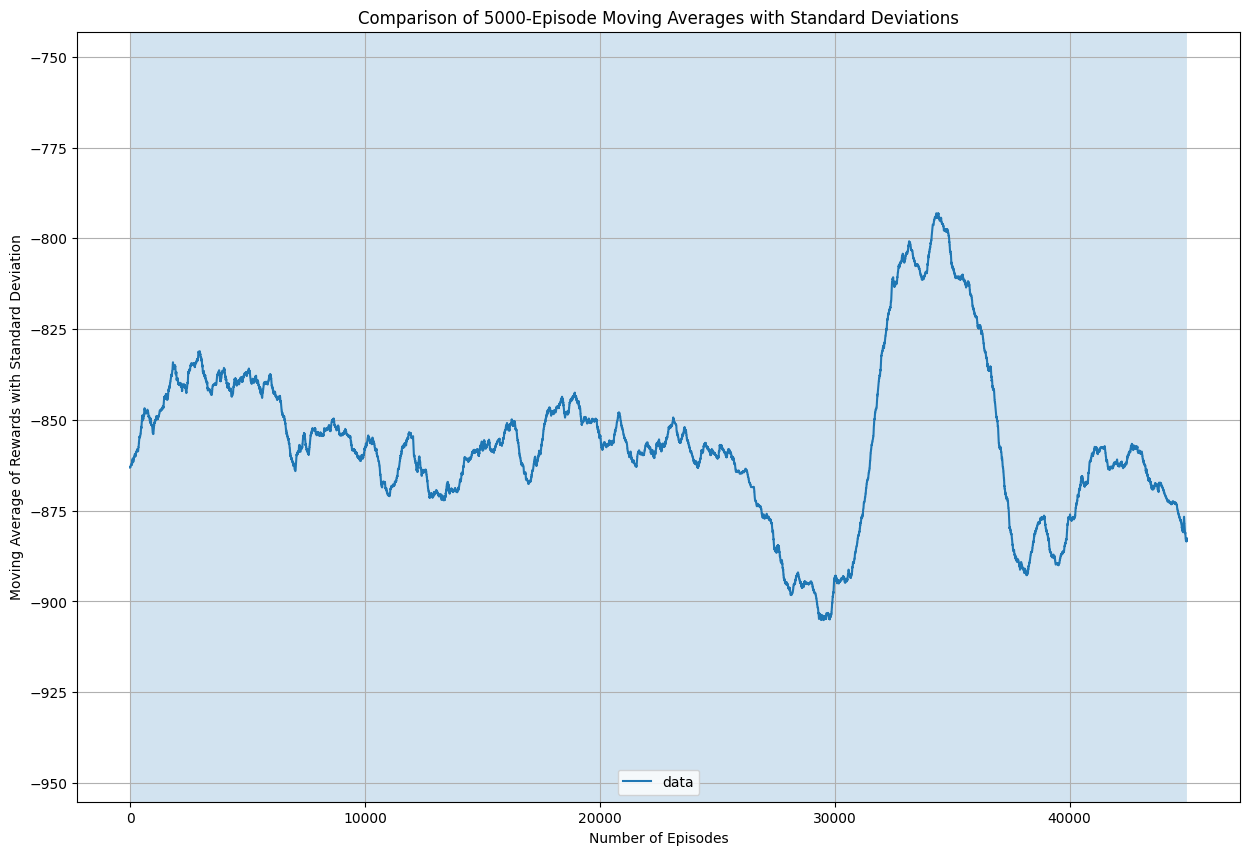

In [16]:
plot_moving_averages({"data": {"avg": training_historic[0]}}, window_size=5000)

In [ ]:
env = gym.make("MountainCar-v0", render_mode=None)

neural_network_sarsa = NeuralNetworkSarsa(
    nb_actions=env.action_space.n,
    encode_fct=no_encode,
    policy=EpsGreedy(1),
    model=SimpleDenseModel(input_size=3, hidden_size=64, output_size=1),
    optimizer=optim.Adam,
    loss=nn.MSELoss(),
)

_ = neural_network_qlearning.train(
    env=env,
    alpha=0.005,
    gamma=1,
    policy_action_params={"epsilon": 1},
    policy_update_params={"use_glei": True, "decay_type": "gradually"},
    network_update_frequency=20,
    nb_episodes=20000,
    verbose=2,
)
_ = neural_network_qlearning.evaluate_policy(
    env=env, policy_action_params={"hard_policy": True}, nb_episodes=10, verbose=1
)

In [6]:
env = gym.make("MountainCar-v0", render_mode=None)

neural_network_qlearning = NeuralNetworkQLearning(
    nb_actions=env.action_space.n,
    encode_fct=no_encode,
    policy=EpsGreedy(0.1),
    model=SimpleDenseModel(input_size=3, hidden_size=64, output_size=1),
    optimizer=optim.Adam,
    loss=nn.MSELoss(),
)

_ = neural_network_qlearning.train(
    env=env,
    alpha=0.005,
    gamma=1,
    policy_action_params={},
    policy_update_params={
        "use_glei": True,
        "update_frequency": 20,
        "decay_type": "by_stage",
    },
    network_update_frequency=1,
    nb_episodes=20000,
    verbose=2,
)
_ = neural_network_qlearning.evaluate_policy(
    env=env, policy_action_params={"hard_policy": True}, nb_episodes=10, verbose=1
)

Episode 1: Total Reward = -200.0
Episode 2: Total Reward = -200.0
Episode 3: Total Reward = -200.0
Episode 4: Total Reward = -200.0
Episode 5: Total Reward = -200.0
Episode 6: Total Reward = -200.0
Episode 7: Total Reward = -200.0
Episode 8: Total Reward = -200.0
Episode 9: Total Reward = -200.0
Episode 10: Total Reward = -200.0
Episode 11: Total Reward = -200.0
Episode 12: Total Reward = -200.0
Episode 13: Total Reward = -200.0
Episode 14: Total Reward = -200.0
Episode 15: Total Reward = -200.0
Episode 16: Total Reward = -200.0
Episode 17: Total Reward = -200.0
Episode 18: Total Reward = -200.0
Episode 19: Total Reward = -200.0
Episode 20: Total Reward = -200.0
Episode 21: Total Reward = -200.0
Episode 22: Total Reward = -200.0
Episode 23: Total Reward = -200.0
Episode 24: Total Reward = -200.0
Episode 25: Total Reward = -200.0
Episode 26: Total Reward = -200.0
Episode 27: Total Reward = -200.0
Episode 28: Total Reward = -200.0
Episode 29: Total Reward = -200.0
Episode 30: Total Rewar

In [ ]:
plot_moving_averages(rewards_dict, window_size):

# Sandbox

In [18]:
class SimpleDenseModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.hidden_layer(x)
        x = self.relu(x)
        return self.output_layer(x)


model = SimpleDenseModel(3, 8, 1)

In [61]:
x = torch.tensor(
    [
        [*(0.245, 1.233), 0],
        [*(0.6, 0.045), 1],
        [*(-1.55, 1.233), 2],
    ]
)
print(np.argmax(model(x).detach().numpy().flatten()))
print(model(torch.tensor([*(0.245, 1.233), 0])))
print(model(torch.tensor([*(0.6, 0.045), 1])))
print(model(torch.tensor([*(-1.55, 1.233), 2])))

2
tensor([0.4378], grad_fn=<ViewBackward0>)
tensor([0.4402], grad_fn=<ViewBackward0>)
tensor([0.4767], grad_fn=<ViewBackward0>)


In [48]:
x.tolist()x

[[0.24500000476837158, 1.2330000400543213, 0.0],
 [0.6000000238418579, 0.04500000178813934, 1.0],
 [-1.5499999523162842, 1.2330000400543213, 2.0]]